<a href="https://colab.research.google.com/github/boqchen/Mathematical-Foundations-of-Computer-Graphics-and-Vision---SS21/blob/main/MCGV_HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MATHEMATICAL FOUNDATIONS OF COMPUTER GRAPHICS AND VISION**

EXERCISE 2 - GLOBAL OPTIMIZATION

Boqi Chen (20-953-048)

**A. Derivation of the problem formulation in the canonical form of Linear Programming**

The general consensus set maximization can be mathematically formulated as: \begin{equation}
\begin{split}
\max_{\Theta, S_{I}} &\quad \text{card}(S_{I}) \\
\text{s.t.} 	&\quad f(\Theta,q_i)\leq\delta, \ \forall i \in S_I \subseteq S
\end{split}
\end{equation}

In our context of 2D translation with correspondences between two images, we have:
$$f_x(\Theta,p_i,p_i')=\vert x_i+T_x-x_i'\vert$$
$$f_y(\Theta,p_i,p_i')=\vert y_i+T_y-y_i'\vert$$
A correspondence $(p_i, p_i')$ is considered inlier if the $x$ and $y$ residuals are below the inlier threshold:
$$\vert x_i+T_x-x_i'\vert\leq\delta$$ and $$\vert y_i+T_y-y_i'\vert\leq\delta$$
Thus, Our consensus set maximization problem can now be formulated as:
\begin{equation}
\begin{split}
\max_{\Theta, S_{I}} &\quad \text{card}(S_{I}) \\
\text{s.t.} 	&\quad \vert x_i+T_x-x_i'\vert\leq\delta, \ \forall i \in S_I \subseteq S \\&\quad \vert y_i+T_y-y_i'\vert\leq\delta, \ \forall i \in S_I \subseteq S
\end{split}
\end{equation}

We can reformulate and relax the optimization problem with $z$ values as:
\begin{equation}
\begin{split}
\max_{\Theta, z} &\quad \sum_{i=1}^{N}z_i \\
\text{s.t.} 	&\quad z_i\vert x_i+T_x-x_i'\vert\leq z_i\delta, \ \forall i \in S_I \subseteq S \\&\quad z_i\vert y_i+T_y-y_i'\vert\leq z_i\delta, \ \forall i \in S_I \subseteq S \\&\quad 0\leq z_i\leq 1, \ \forall i \in S_I \subseteq S \\&\quad \underline{T_{x}} \leq T_{x} \leq \overline{T_{x}}, \quad \forall i = 1 \dots N \\&\quad \underline{T_{y}} \leq T_{y} \leq \overline{T_{y}}, \quad \forall i = 1 \dots N 
\end{split}
\end{equation}
This is equivalent to:
\begin{equation}
\begin{split}
\max_{\Theta, z} &\quad \sum_{i=1}^{N}z_i \\
\text{s.t.} 	&\quad -z_i\delta\leq z_i(x_i+T_x-x_i')\leq z_i\delta, \ \forall i \in S_I \subseteq S \\&\quad -z_i\delta\leq z_i(y_i+T_y-y_i')\leq z_i\delta, \ \forall i \in S_I \subseteq S \\&\quad 0\leq z_i\leq 1, \ \forall i \in S_I \subseteq S \\&\quad \underline{T_{x}} \leq T_{x} \leq \overline{T_{x}}, \quad \forall i = 1 \dots N \\&\quad \underline{T_{y}} \leq T_{y} \leq \overline{T_{y}}, \quad \forall i = 1 \dots N 
\end{split}
\end{equation}
To get rid of the bilinear terms which are introduced by multiplication of $z$ and $T$, we can introduce new auxiliary variables $w_{ix}=z_iT_x$ and $w_{iy}=z_iT_y$, then the constraints 
\begin{equation}
\begin{split}
&\quad \underline{T_{x}} \leq T_{x} \leq \overline{T_{x}}, \quad \forall i = 1 \dots N \\&\quad \underline{T_{y}} \leq T_{y} \leq \overline{T_{y}}, \quad \forall i = 1 \dots N 
\end{split}
\end{equation}
can be relatexed byconcave and convex envelopes:
\begin{equation}
\begin{split}
&\quad w_{ix}\geq\max(\underline{z_i}T_x+z_i\underline{T_{x}}-\underline{z_i}\underline{T_{x}},\overline{z_i}T_x+z_i\overline{T_{x}}-\overline{z_i}\overline{T_{x}})\\&\quad  w_{ix}\leq\min(\overline{z_i}T_x+z_i\underline{T_{x}}-\overline{z_i}\underline{T_{x}},\underline{z_i}T_x+z_i\overline{T_{x}}-\underline{z_i}\overline{T_{x}})\\&\quad w_{iy}\geq\max(\underline{z_i}T_y+z_i\underline{T_{y}}-\underline{z_i}\underline{T_{y}},\overline{z_i}T_y+z_i\overline{T_{y}}-\overline{z_i}\overline{T_{y}})\\&\quad  w_{iy}\leq\min(\overline{z_i}T_y+z_i\underline{T_{y}}-\overline{z_i}\underline{T_{y}},\underline{z_i}T_y+z_i\overline{T_{y}}-\underline{z_i}\overline{T_{y}})
\end{split}
\end{equation}
i.e.,
\begin{equation}
\begin{split}
\quad \underline{z_i}T_x+z_i\underline{T_{x}}-w_{ix}&\leq\underline{z_i}\underline{T_{x}}\\ \quad \overline{z_i}T_x+z_i\overline{T_{x}}-w_{ix}&\leq\overline{z_i}\overline{T_{x}}\\\quad-\overline{z_i}T_x-z_i\underline{T_{x}}+w_{ix}&\leq-\overline{z_i}\underline{T_{x}}\\\quad-\underline{z_i}T_x-z_i\overline{T_{x}}+w_{ix}&\leq-\underline{z_i}\overline{T_{x}}\\  \quad \underline{z_i}T_y+z_i\underline{T_{y}}-w_{iy}&\leq\underline{z_i}\underline{T_{y}}\\\quad \overline{z_i}T_y+z_i\overline{T_{y}}-w_{iy}&\leq\overline{z_i}\overline{T_{y}}\\\quad-\overline{z_i}T_y-z_i\underline{T_{y}}+w_{iy}&\leq-\overline{z_i}\underline{T_{y}}\\\quad-\underline{z_i}T_y-z_i\overline{T_{y}}+w_{iy}&\leq-\underline{z_i}\overline{T_{y}}
\end{split}
\end{equation}
Also with auxiliary variables $w_{ix}=z_iT_x$ and $w_{iy}=z_iT_y$, the constraints
\begin{equation}
\begin{split}
&\quad -z_i\delta\leq z_i(x_i+T_x-x_i')\leq z_i\delta\\&\quad -z_i\delta\leq z_i(y_i+T_y-y_i')\leq z_i\delta
\end{split}
\end{equation}
can be rewritten as:
\begin{equation}
\begin{split}
\quad z_ix_i+w_{ix}-z_ix_i'-z_i\delta&\leq 0\\\quad -z_ix_i-w_{ix}+z_ix_i'-z_i\delta&\leq 0\\\quad z_iy_i+w_{iy}-z_iy_i'-z_i\delta&\leq 0\\\quad -z_iy_i-w_{iy}+z_iy_i'-z_i\delta&\leq 0
\end{split}
\end{equation}

Thus, the optimization problem is reformulated as:
\begin{equation}
\begin{split}
\max_{\Theta, z} \quad \sum_{i=1}^{N}z_i\\ \text{s.t.} 
\quad z_ix_i+w_{ix}-z_ix_i'-z_i\delta&\leq 0, \ \forall i \in S_I \subseteq S \\\quad -z_ix_i-w_{ix}+z_ix_i'-z_i\delta&\leq 0, \ \forall i \in S_I \subseteq S \\\quad z_iy_i+w_{iy}-z_iy_i'-z_i\delta&\leq 0, \ \forall i \in S_I \subseteq S \\\quad -z_iy_i-w_{iy}+z_iy_i'-z_i\delta&\leq 0, \ \forall i \in S_I \subseteq S  \\\quad \underline{z_i}T_x+z_i\underline{T_{x}}-w_{ix}&\leq\underline{z_i}\underline{T_{x}},\ \forall i = 1 \dots N\\ \quad \overline{z_i}T_x+z_i\overline{T_{x}}-w_{ix}&\leq\overline{z_i}\overline{T_{x}},\ \forall i = 1 \dots N\\\quad-\overline{z_i}T_x-z_i\underline{T_{x}}+w_{ix}&\leq-\overline{z_i}\underline{T_{x}},\ \forall i = 1 \dots N\\\quad-\underline{z_i}T_x-z_i\overline{T_{x}}+w_{ix}&\leq-\underline{z_i}\overline{T_{x}},\ \forall i = 1 \dots N\\  \quad \underline{z_i}T_y+z_i\underline{T_{y}}-w_{iy}&\leq\underline{z_i}\underline{T_{y}},\ \forall i = 1 \dots N\\\quad \overline{z_i}T_y+z_i\overline{T_{y}}-w_{iy}&\leq\overline{z_i}\overline{T_{y}},\ \forall i = 1 \dots N\\\quad-\overline{z_i}T_y-z_i\underline{T_{y}}+w_{iy}&\leq-\overline{z_i}\underline{T_{y}},\ \forall i = 1 \dots N\\\quad-\underline{z_i}T_y-z_i\overline{T_{y}}+w_{iy}&\leq-\underline{z_i}\overline{T_{y}},\ \forall i = 1 \dots N\\\quad 0&\leq z_i\leq 1,\ \forall i = 1 \dots N
\end{split}
\end{equation}
Thus, the canonical form of the optimization problem is:

\begin{equation}
\begin{split}
\min_{\mathbf{x}} &\quad c^T\mathbf{x} \\
\text{s.t.} 	&\quad A_{ub}\mathbf{x}\leq b_{ub}\\&\quad\mathcal{l}\leq\mathbf{x}\leq\mathcal{u}
\end{split}
\end{equation}
where 
$$\mathbf{x}=[T_x,T_y,z_1,\cdots,z_n,w_{1x},\cdots,w_{nx},w_{1y},\cdots,w_{ny}]^T$$
$$l=[\underline{T_x},\underline{T_y},\underline{z_1},\cdots,\underline{z_n},-\infty,\cdots,-\infty]^T$$
$$u=[\overline{T_x},\overline{T_y},\overline{z_1},\cdots\overline{z_n},+\infty,\cdots,+\infty]^T$$
$$c=[0,0,-1,\cdots,-1,0,\cdots,0]^T$$
$$A_{ub}=\left [
\begin{matrix}
A_1   \\
\vdots \\
A_i \\
\vdots   \\
A_n
\end{matrix}\right], b_{ub}=\left [
\begin{matrix}
b_1   \\
\vdots \\
b_i \\
\vdots   \\
b_n
\end{matrix}\right]$$
where
$$
A_i = \left [
\begin{matrix}
	0 & 0 &	0 & \dots & (x_{i} - x_{i}' - \delta) & \dots & 0		& 0 & \dots & 1 & \dots & 0 	& 0 & \dots & 0 & \dots & 0 \\
	0 & 0 &	0 & \dots & (-x_{i} + x_{i}' - \delta) & \dots & 0		& 0 & \dots & -1 & \dots & 0 	& 0 & \dots & 0 & \dots & 0 \\
	0 & 0 &	0 & \dots & (y_{i} - y_{i}' - \delta) & \dots & 0		& 0 & \dots & 0 & \dots & 0 	& 0 & \dots & 1 & \dots & 0 \\
	0 & 0 &	0 & \dots & (-y_{i} + y_{i}' - \delta) & \dots & 0		& 0 & \dots & 0 & \dots & 0 	& 0 & \dots & -1 & \dots & 0 \\
	\underline{z_{i}} & 0 &	0 & \dots & \underline{T_{x}} & \dots & 0	& 0 & \dots & -1 & \dots & 0 	& 0 & \dots & 0 & \dots & 0 \\
	\overline{z_{i}} & 0 &		0 & \dots & \overline{T_{x}} & \dots & 0		& 0 & \dots & -1 & \dots & 0 	& 0 & \dots & 0 & \dots & 0 \\
	-\overline{z_{i}} & 0 &	0 & \dots & -\underline{T_{x}} & \dots & 0	& 0 & \dots & 1 & \dots & 0 	& 0 & \dots & 0 & \dots & 0 \\
	-\underline{z_{i}} & 0 &	0 & \dots & -\overline{T_{x}} & \dots & 0		& 0 & \dots & 1 & \dots & 0 	& 0 & \dots & 0 & \dots & 0 \\
	0 & \underline{z_{i}} & 	0 & \dots & \underline{T_{y}} & \dots & 0	& 0 & \dots & 0 & \dots & 0 	& 0 & \dots & -1 & \dots & 0 \\
	0 & \overline{z_{i}} & 	0 & \dots & \overline{T_{y}} & \dots & 0		& 0 & \dots & 0 & \dots & 0 	& 0 & \dots & -1 & \dots & 0 \\
	0 & -\overline{z_{i}} & 	0 & \dots & -\underline{T_{y}} & \dots & 0	& 0 & \dots & 0 & \dots & 0 	& 0 & \dots & 1 & \dots & 0 \\
	0 & -\underline{z_{i}} & 	0 & \dots & -\overline{T_{y}} & \dots & 0		& 0 & \dots & 0 & \dots & 0 	& 0 & \dots & 1 & \dots & 0 
\end{matrix}
\right], b_i=\left [
\begin{matrix}
0 \\ 0 \\ 0 \\ 0 \\ 
\underline{z_{i}}\underline{T_{x}} \\
\overline{z_{i}} \overline{T_{x}} \\
-\overline{z_{i}} \underline{T_{x}} \\
-\underline{z_{i}} \overline{T_{x}} \\
\underline{z_{i}}\underline{T_{y}} \\
\overline{z_{i}} \overline{T_{y}} \\
-\overline{z_{i}} \underline{T_{y}} \\
-\underline{z_{i}} \overline{T_{y}}
\end{matrix}
\right] 
$$



In [ ]:
import numpy as np
import cv2
import scipy
import scipy.io
from scipy.optimize import linprog
from math import floor, ceil

In [ ]:
class problem_list(object):

  def __init__(self, ThetaLowerBound, ThetaUpperBound, ObjLowerBound, ObjUpperBound, ThetaOptimizer):
    self.ThetaLowerBound = ThetaLowerBound
    self.ThetaUpperBound = ThetaUpperBound
    self.ObjLowerBound = ObjLowerBound
    self.ObjUpperBound = ObjUpperBound
    self.ThetaOptimizer = ThetaOptimizer

In [ ]:
def SplitProblem(parent):

  Tx_ub = parent.ThetaUpperBound[0];
  Ty_ub = parent.ThetaUpperBound[1];
  Tx_lb = parent.ThetaLowerBound[0];
  Ty_lb = parent.ThetaLowerBound[1];
    
  x_range = Tx_ub - Tx_lb;
  y_range = Ty_ub - Ty_lb;
    
  if x_range > y_range:

    mid = Tx_lb + x_range/2;
        
    left_child = NewProblem([Tx_lb, Ty_lb], [floor(mid), Ty_ub])
    right_child = NewProblem([ceil(mid), Ty_lb], [Tx_ub, Ty_ub])
  
  else:
    mid = Ty_lb + y_range/2;
        
    left_child = NewProblem([Tx_lb, Ty_lb], [Tx_ub, floor(mid)])
    right_child = NewProblem([Tx_lb, ceil(mid)], [Tx_ub, Ty_ub])
  
  return left_child, right_child

In [ ]:
def NewProblem(thetaLowerBound, thetaUpperBound):
  
  newProb = problem_list(thetaLowerBound, thetaUpperBound, [], [], [])

  return newProb

In [ ]:
def FindBestCandidate(pro_1, pro_2):

  pro_1 = pro_1
  pro_2 = pro_2
    
  if pro_1.ObjLowerBound > pro_2.ObjLowerBound:
    best_pro = pro_1
    not_best_pro = pro_2

  elif pro_1.ObjLowerBound == pro_2.ObjLowerBound:
    
    if pro_1.ObjUpperBound >= pro_2.ObjUpperBound:
      best_pro = pro_1
      not_best_pro = pro_2

    else:
      best_pro = pro_2
      not_best_pro = pro_1
    
  else:
    best_pro = pro_2
    not_best_pro = pro_1

  return best_pro, not_best_pro


In [ ]:
def SolveWithLP(p_left, p_right, prob, thres):

  n = p_left.shape[0]

  x_xd_delta = p_left[:, 0 ] - p_right[:, 0] - thres
  y_yd_delta = p_left[:, 1 ] - p_right[:, 1] - thres

  xd_x_delta = -p_left[:, 0 ] + p_right[:, 0] - thres
  yd_y_delta = -p_left[:, 1 ] + p_right[:, 1] - thres

  a = np.concatenate((np.zeros((n,2)), np.diag(x_xd_delta), np.eye(n), np.zeros((n,n))), axis = 1)
  c = np.concatenate((np.zeros((n,2)), np.diag(xd_x_delta), -np.eye(n), np.zeros((n,n))), axis = 1)
  d = np.concatenate((np.zeros((n,2)), np.diag(y_yd_delta), np.zeros((n,n)), np.eye(n)), axis = 1)
  e = np.concatenate((np.zeros((n,2)), np.diag(yd_y_delta), np.zeros((n,n)), -np.eye(n)), axis = 1)

  A1 = np.concatenate((a, c, d, e), axis = 0)
  
  b1 = np.zeros((4*n, 1))

  Tx_lb = prob.ThetaLowerBound[0]
  Ty_lb = prob.ThetaLowerBound[1]
  Tx_ub = prob.ThetaUpperBound[0]
  Ty_ub = prob.ThetaUpperBound[1]

  f = np.concatenate((np.zeros((n,2)), Tx_lb * np.eye(n), -np.eye(n), np.zeros((n, n))), axis = 1)
  g = np.concatenate((np.ones((n,1)), np.zeros((n,1)), Tx_ub * np.eye(n), -np.eye(n), np.zeros((n, n))), axis = 1)
  h = np.concatenate((-np.ones((n,1)), np.zeros((n,1)), -Tx_lb * np.eye(n), np.eye(n), np.zeros((n, n))), axis = 1)
  i = np.concatenate((np.zeros((n,2)), -Tx_ub * np.eye(n), np.eye(n), np.zeros((n, n))), axis = 1)

  A2 = np.concatenate((f, g, h, i), axis = 0)

  b2 = np.concatenate((np.zeros((n, 1)), Tx_ub * np.ones((n, 1)), -Tx_lb * np.ones((n, 1)), np.zeros((n, 1))), axis = 0)



  j = np.concatenate((np.zeros((n,2)), Ty_lb * np.eye(n), np.zeros((n, n)), -np.eye(n)), axis = 1)
  k = np.concatenate((np.zeros((n,1)), np.ones((n,1)), Ty_ub * np.eye(n), np.zeros((n, n)), -np.eye(n)), axis = 1)
  l = np.concatenate((np.zeros((n,1)), -np.ones((n,1)), -Ty_lb * np.eye(n), np.zeros((n, n)), np.eye(n)), axis = 1)
  m = np.concatenate((np.zeros((n,2)), -Ty_ub * np.eye(n), np.zeros((n, n)), np.eye(n)), axis = 1)
  
  A3 = np.concatenate((j, k, l, m), axis = 0)
  b3 = np.concatenate((np.zeros((n, 1)), Ty_ub * np.ones((n, 1)), -Ty_lb * np.ones((n, 1)), np.zeros((n, 1))), axis = 0)  

  A = np.concatenate((A1, A2, A3), axis = 0)
  b = np.concatenate((b1, b2, b3), axis = 0)
  # np.set_printoptions(threshold=np.inf)
  # print(A)
  # print(b)

  c = np.concatenate((np.zeros((1, 1)), np.zeros((1, 1)), -np.ones((n, 1)), np.zeros((2 * n, 1))), axis = 0)

  bounds = []
  bounds.append((Tx_lb, Tx_ub))
  bounds.append((Ty_lb, Ty_ub))
  for i in range(n):
    bounds.append((0, 1))
  
  for i in range(2*n):
    bounds.append((None, None))

  res = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='revised simplex', options={'tol': 1e-8})

  T_x = res.x[0]
  T_y = res.x[1]
  n_inlier_ub = -res.fun
  
  x_left = p_left[:, 0]
  y_left = p_left[:, 1]
    
  x_right = p_right[:, 0]
  y_right = p_right[:, 1]
    
  inlier_mask = (abs(x_left + T_x - x_right) <= thres) & (abs(y_left + T_y - y_right) <= thres)

  n_inlier_lb = np.count_nonzero(inlier_mask)

  prob.ThetaOptimizer = [T_x, T_y]
  prob.ObjLowerBound = n_inlier_lb
  prob.ObjUpperBound = n_inlier_ub

  return prob

In [ ]:
import warnings

warnings.filterwarnings('ignore')

threshold = 3

# read images
print('------------ read images ---------------')
left_image =  cv2.imread('InputLeftImage.png')
right_image = cv2.imread('InputRightImage.png')

img_left_h = left_image.shape[0]
img_left_w = left_image.shape[1]

img_right_h = right_image.shape[0]
img_right_w = right_image.shape[1]

print('------------ read data ------------------')
# read input points
data = scipy.io.loadmat('ListInputPoints.mat')
input_points = np.array(data['ListInputPoints'])
p_left = input_points[:, 0:2]
p_right = input_points[:, 2:4]
n = p_left.shape[0]

print('------------ define p0 ------------------')

p0 = NewProblem([-img_left_w, -img_left_h], [img_left_w, img_left_h])
p0 = SolveWithLP(p_left, p_right, p0, threshold)

print('------------ visulize p0 -----------------')
print('ThetaLowerBound: ', p0.ThetaLowerBound)
print('ThetaUpperBound: ', p0.ThetaUpperBound)
print('ObjLowerBound: ', p0.ObjLowerBound)
print('ObjUpperBound: ', p0.ObjUpperBound)
print('ThetaOptimizer: ', p0.ThetaOptimizer)

print('------------- initialze prob stack -------------')
stack = []
stack.append(p0)

print('------------- initialze history -------------')
optimal_inlier = [np.inf, -np.inf]
optimal_solution = []
optimal_history = []

print('------------- b&b algorithm ------------------')
while len(stack) > 0:

  p_parent = stack.pop()

  if p_parent.ObjUpperBound < optimal_inlier[1]:
    continue

  if p_parent.ObjLowerBound >= optimal_inlier[1]:
    optimal_inlier = [p_parent.ObjUpperBound, p_parent.ObjLowerBound]
    optimal_solution = p_parent.ThetaOptimizer
    print('optimal_solution: ', optimal_solution)

  optimal_history.append(optimal_inlier)
  print('optimal_history: ', optimal_history)

  if p_parent.ObjUpperBound - p_parent.ObjLowerBound < 1:
    continue

  p_left_child, p_right_child = SplitProblem(p_parent)

  print('p_left_child.ThetaLowerBound: ', p_left_child.ThetaLowerBound)
  print('p_left_child.ThetaUpperBound', p_left_child.ThetaUpperBound)
  p_left_child = SolveWithLP(p_left, p_right, p_left_child, threshold)

  print('p_right_child.ThetaLowerBound: ', p_right_child.ThetaLowerBound)
  print('p_right_child.ThetaUpperBound', p_right_child.ThetaUpperBound)

  p_right_child = SolveWithLP(p_left, p_right, p_right_child, threshold)

  p_better, p_worse = FindBestCandidate(p_left_child, p_right_child)

  stack.append(p_worse)
  stack.append(p_better)


------------ read images ---------------
------------ read data ------------------
------------ define p0 ------------------
------------ visulize p0 -----------------
ThetaLowerBound:  [-1104, -549]
ThetaUpperBound:  [1104, 549]
ObjLowerBound:  0
ObjUpperBound:  40.17940125197758
ThetaOptimizer:  [-140.9447708578142, -106.08695652173913]
------------- initialze prob stack -------------
------------- initialze history -------------
------------- b&b algorithm ------------------
optimal_solution:  [-140.9447708578142, -106.08695652173913]
optimal_history:  [[40.17940125197758, 0]]
p_left_child.ThetaLowerBound:  [-1104, -549]
p_left_child.ThetaUpperBound [0, 549]
p_right_child.ThetaLowerBound:  [0, -549]
p_right_child.ThetaUpperBound [1104, 549]
optimal_solution:  [-336.28774164311346, -74.21214506338475]
optimal_history:  [[40.17940125197758, 0], [28.156515277780898, 0]]
p_left_child.ThetaLowerBound:  [-1104, -549]
p_left_child.ThetaUpperBound [-552, 549]
p_right_child.ThetaLowerBound: 

In [ ]:
T_x = optimal_solution[0]
T_y = optimal_solution[1]
print('Tx: ', T_x)
print('Ty: ', T_y)

p_left = input_points[:, 0:2]
print(p_left)
p_right = input_points[:, 2:4]

x_left = p_left[:, 0]
y_left = p_left[:, 1]
    
x_right = p_right[:, 0]
y_right = p_right[:, 1]
    
inlier_mask = (abs(x_left + T_x - x_right) <= threshold) & (abs(y_left + T_y - y_right) <= threshold)

n_inlier_lb = sum(inlier_mask)
print('n_inlier_lb: ', n_inlier_lb)

inliers_left = p_left[inlier_mask, :]
inliers_right = p_right[inlier_mask, :]
outliers_left = p_left[~inlier_mask, :]
outliers_right = p_right[~inlier_mask, :]


Tx:  -232.0
Ty:  -154.00000000000003
[[1098.    470.  ]
 [ 653.    500.  ]
 [ 816.75  493.25]
 [ 446.    514.  ]
 [ 457.    170.  ]
 [1096.    441.  ]
 [ 128.     29.  ]
 [ 984.75  302.75]
 [ 344.25  256.25]
 [ 548.    353.  ]
 [1099.    103.  ]
 [ 206.    106.  ]
 [1082.    157.  ]
 [ 438.    388.  ]
 [ 666.75  187.25]
 [ 509.25  470.75]
 [ 718.    536.  ]
 [ 432.    150.  ]
 [ 706.    141.  ]
 [1085.25  491.75]
 [ 254.    317.  ]
 [ 352.     74.  ]
 [ 260.    246.  ]
 [ 825.    131.  ]
 [ 345.    161.  ]
 [ 884.25  509.75]
 [1100.    529.  ]
 [ 551.    445.  ]
 [ 917.    472.  ]
 [ 679.      7.  ]
 [ 891.75  280.25]
 [ 689.25  415.25]
 [ 588.    391.  ]
 [1055.25  337.25]
 [ 897.75  247.25]
 [ 499.    211.  ]
 [ 646.    521.  ]
 [ 948.    501.  ]
 [ 617.    101.  ]
 [ 393.75  373.25]
 [ 435.    454.  ]
 [ 851.25  467.75]
 [ 188.     82.  ]
 [  67.    399.  ]
 [ 998.25  418.25]
 [ 500.    413.  ]
 [ 663.     95.  ]
 [1092.     50.  ]
 [ 414.     72.  ]
 [ 298.    289.  ]
 [ 728.25  25

[[40.17940125197758, 0], [28.156515277780898, 0], [24.882888900135537, 15], [24.882888900135537, 15], [16.466501371970303, 15], [15.894208571002363, 15]]


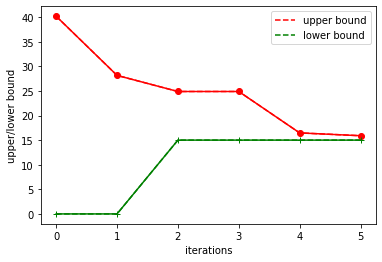

In [ ]:
import matplotlib.pyplot as plt

print(optimal_history)

ubs = []
lbs = []
x = []

for i in range(len(optimal_history)):
  x.append(i)
  ubs.append(optimal_history[i][0])
  lbs.append(optimal_history[i][1])

l1=plt.plot(x,ubs,'r--',label='upper bound')
l2=plt.plot(x,lbs,'g--',label='lower bound')
plt.plot(x,ubs,'ro-',x,lbs,'g+-')
plt.xlabel('iterations')
plt.ylabel('upper/lower bound')
plt.legend()
plt.show()




In [ ]:
x_left = p_left[:, 0]
y_left = p_left[:, 1]

x_right = p_right[:, 0]
y_right = p_right[:, 1]

img1 =  cv2.imread('InputLeftImage.png')
img2 = cv2.imread('InputRightImage.png')

h1 = img1.shape[0]
w1 = img1.shape[1]

h2 = img2.shape[0]
w2= img2.shape[1]

view = np.zeros((max(h1, h2), w1 + w2, 3), np.uint8)
view[:h1, :w1, :] = img1  
view[:h2, w1:, :] = img2
view[:, :, 1] = view[:, :, 0]  
view[:, :, 2] = view[:, :, 0]

for i in range(x_left.shape[0]):
    # draw the keypoints
    # print m.queryIdx, m.trainIdx, m.distance
    cv2.line(view, (int(x_left[i]), int(y_left[i])) , (int(x_right[i] + w1), int(y_right[i])), (255, 0, 0), 1)

cv2.imwrite('original_correspondence.png', view)

view1 = np.zeros((max(h1, h2), w1 + w2, 3), np.uint8)
view1[:h1, :w1, :] = img1  
view1[:h2, w1:, :] = img2
view1[:, :, 1] = view[:, :, 0]  
view1[:, :, 2] = view[:, :, 0]

x_inliers_left = inliers_left[:, 0]
y_inliers_left = inliers_left[:, 1]
x_inliers_right = inliers_right[:, 0]
y_inliers_right = inliers_right[:, 1]

for i in range(x_inliers_left.shape[0]):
    # draw the keypoints
    # print m.queryIdx, m.trainIdx, m.distance
    cv2.line(view1, (int(x_inliers_left[i]), int(y_inliers_left[i])) , (int(x_inliers_right[i] + w1), int(y_inliers_right[i])), (0, 255, 0), 1)

x_outliers_left = outliers_left[:, 0]
y_outliers_left = outliers_left[:, 1]
x_outliers_right = outliers_right[:, 0]
y_outliers_right = outliers_right[:, 1]

for i in range(x_outliers_left.shape[0]):
  cv2.line(view1, (int(x_outliers_left[i]), int(y_outliers_left[i])) , (int(x_outliers_right[i] + w1), int(y_outliers_right[i])), (0, 0, 255), 1)


cv2.imwrite('corrected_correspondence.png', view1)








True